In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("%s 일 때 훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)) % (0))
print("%s 일 때 테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)) % (0))

for i in range(5):
    tree = DecisionTreeClassifier(max_depth=2**i, random_state=0)
    tree.fit(X_train, y_train)
    print("%s 일 때 훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)) % (2**i))
    print("%s 일 때 테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)) % (2**i))

0 일 때 훈련 세트 정확도: 1.000
0 일 때 테스트 세트 정확도: 0.937
1 일 때 훈련 세트 정확도: 0.923
1 일 때 테스트 세트 정확도: 0.923
2 일 때 훈련 세트 정확도: 0.958
2 일 때 테스트 세트 정확도: 0.909
4 일 때 훈련 세트 정확도: 0.988
4 일 때 테스트 세트 정확도: 0.951
8 일 때 훈련 세트 정확도: 1.000
8 일 때 테스트 세트 정확도: 0.937
16 일 때 훈련 세트 정확도: 1.000
16 일 때 테스트 세트 정확도: 0.937


일정 깊이 도달하면 트리의 성장 제한 -> 과대적합 줄어든다.

In [2]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


C:\Users\hyhan\Anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hyhan\Anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hyhan\Anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hyhan\Anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hyhan\Anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hyhan\Anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_

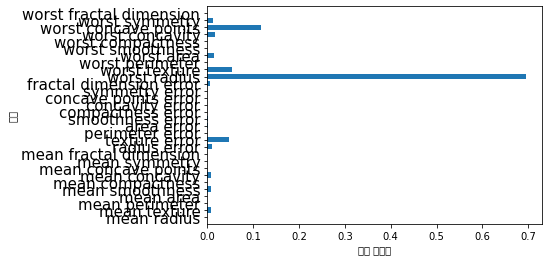

In [3]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names, color = 'black', fontsize = 15)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)
plt.show()

In [5]:
import pandas as pd
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("year")
plt.ylabel("price ($/Mbyte_")
plt.show()

NameError: name 'mglearn' is not defined

In [ ]:
import matplotlib.font_manager as fm

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import mglearn
import pandas as pd
import os


ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만든다.
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용한다.
X_train = data_train.date[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꾼다.
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행한다.
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌린다.
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)
plt.yticks(fontname = "Arial", fontsize = 15)
plt.semilogy(data_train.date, data_train.price, label="train data")
plt.semilogy(data_test.date, data_test.price, label="test data")
plt.semilogy(ram_prices.date, price_tree, label="tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="lr prediction")

plt.rc('font', size = 12)
# plt.rc('legend', fontsize = 18)
plt.legend().fontcolor = 'white'
plt.legend().fontsize = 18

plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.datasets import make_moons 
X, y = make_moons(n_samples=100, noise=0.25, random_state=3) 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42) #
forest = RandomForestClassifier(n_estimators=5, random_state=2) 
forest.fit(X_train, y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("random forest")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("train acc: {:.3f}".format(forest.score(X_train, y_train)))
print("test acc: {:.3f}".format(forest.score(X_test, y_test)))

In [ ]:
plot_feature_importances_cancer(forest)